In [1]:
pip install numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt


In [3]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [4]:
data_test = pd.read_csv('test.csv')

In [5]:
data_test

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,2.5Unf,7,7,1922,2005,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,Gd,TA,No,BLQ,474.0,Unf,0.0,634.0,1108.0,GasA,TA,N,FuseA,1160,908,0,2068,0.0,0.0,1,1,3,1,Gd,8,Typ,1,Gd,Detchd,1928.0,Unf,1.0,315.0,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,94.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1368.0,1368.0,GasA,Ex,Y,SBrkr,1368,0,0,1368,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,2.0,474.0,TA,TA,Y,132,35,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,128.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,733.0,Unf,0.0,625.0,1358.0,GasA,Ex,Y,SBrkr,1358,0,0,1358,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2010.0,RFn,2.0,484.0,TA,TA,Y,192,35,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,941.0,941.0,GasA,Ex,Y,SBrkr,941,896,0,1837,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,Attchd,1997.0,RFn,2.0,688.0,TA,TA,Y,150,165,0,0,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,453,528174060,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,135.0,Gd,TA,PConc,Gd,TA,Av,ALQ,900.0,Unf,0.0,406.0,1306.0,GasA,Ex,Y,SBrkr,1306,0,0,1306,1.0,0.0,2,0,1,1,Gd,5,Typ,1,Gd,Attchd,2005.0,RFn,2.0,624.0,TA,TA,Y,170,63,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
729,1352,903400180,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,2000,Gambrel,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,833.0,833.0,GasA,Gd,Y,SBrkr,1053,795,0,1848,0.0,0.0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1922.0,Unf,2.0,370.0,TA,TA,N,0,0,0,0,220,0,NaN,NaN,NaN,0,6,2008,WD,Normal
730,197,903227150,50,RM,53.0,6360,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,5,6,1942,1950,Gable,CompShg,MetalSd,MetalSd,Stone,300.0,TA,TA,CBlock,TA,TA,No,Rec,360.0,LwQ,159.0,316.0,835.0,GasA,TA,Y,FuseA,955,498,0,1453,0.0,0.0,1,1,3,1,Gd,7,Min2,2,Fa,Detchd,1942.0,Unf,1.0,240.0,TA,TA,Y

In [6]:
data_train = pd.read_csv('train.csv')

In [7]:
data_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [8]:
data_train.shape

(2197, 82)

In [9]:
data_train.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2192,2764,906420020,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,789.0,Unf,0.0,119.0,908.0,GasA,Ex,Y,SBrkr,927,988,0,1915,1.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,Fin,2.0,506.0,TA,TA,Y,120,150,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
2193,906,909129090,50,RH,70.0,6300,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,4,1938,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,88.0,TA,TA,PConc,TA,Fa,No,LwQ,832.0,Unf,0.0,0.0,832.0,GasA,TA,Y,SBrkr,832,436,0,1268,0.0,0.0,1,1,3,1,TA,7,Typ,2,Gd,Basment,1938.0,Unf,1.0,250.0,TA,TA,Y,0,0,55,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Abnorml,160000
2194,1097,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,870.0,Unf,0.0,167.0,1037.0,GasA,Ex,Y,SBrkr,1037,1285,0,2322,0.0,0.0,2,1,4,1,TA,8,Typ,1,TA,BuiltIn,1999.0,Fin,2.0,400.0,TA,TA,Y,144,44,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2195,236,905426060,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108.0,Unf,0.0,350.0,458.0,GasA,Fa,N,SBrkr,835,0,0,835,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Basment,1920.0,Unf,1.0,366.0,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
2196,1062,528142020,60,RL,74.0,8899,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,108.0,Ex,TA,PConc,Gd,TA,Av,GLQ,40.0,Unf,0.0,908.0,948.0,GasA,Ex,Y,SBrkr,948,1140,0,2088,0.0,0.0,2,1,4,1,Gd,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,656.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,250000


In [10]:
pourcentag=data_train.isnull().mean() * 100

pourcentag.sort_values()

Order              0.000000
Sale Condition     0.000000
Heating QC         0.000000
Central Air        0.000000
1st Flr SF         0.000000
                    ...    
Mas Vnr Type      60.491579
Fence             80.928539
Alley             93.491124
Misc Feature      96.358671
Pool QC           99.453801
Length: 82, dtype: float64

## **Analyse Exploratoire (EDA)**

**Analyse univari**

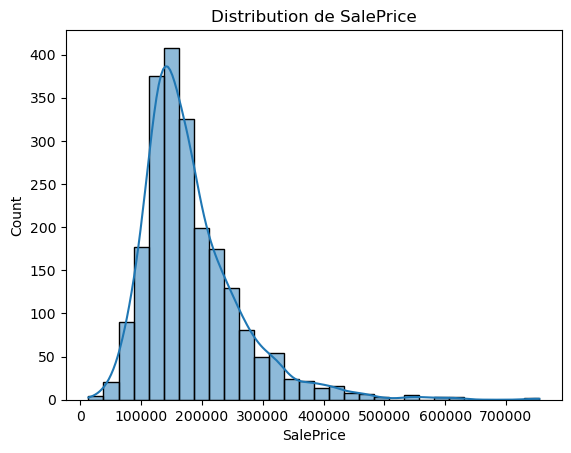

In [11]:

import seaborn as sns
sns.histplot(data_train['SalePrice'], kde=True, bins=30)
plt.title("Distribution de SalePrice")
plt.show()


In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2197.0,1.460513e+03,8.465373e+02,1.0,7.330000e+02,1452.0,2.196000e+03,2.929000e+03
PID,2197.0,7.127872e+08,1.887751e+08,526301100.0,5.284410e+08,535453150.0,9.071811e+08,1.007100e+09
MS SubClass,2197.0,5.706418e+01,4.236069e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,1835.0,6.954932e+01,2.318822e+01,21.0,5.850000e+01,69.0,8.000000e+01,3.130000e+02
Lot Area,2197.0,1.026807e+04,7.975741e+03,1300.0,7.500000e+03,9488.0,1.166000e+04,2.152450e+05
Overall Qual,2197.0,6.116523e+00,1.429613e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2197.0,5.552572e+00,1.107019e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2197.0,1.972031e+03,3.045007e+01,1872.0,1.954000e+03,1975.0,2.002000e+03,2.010000e+03
Year Remod/Add,2197.0,1.984781e+03,2.089825e+01,1950.0,1.966000e+03,1994.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2175.0,1.051016e+02,1.848972e+02,0.0,0.000000e+00,0.0,1.660000e+02,1.600000e+03


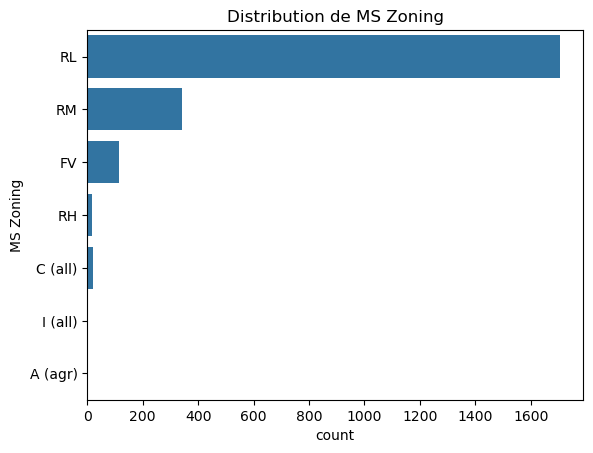

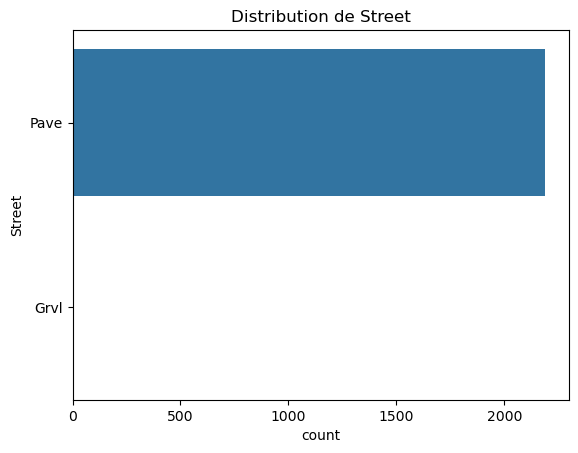

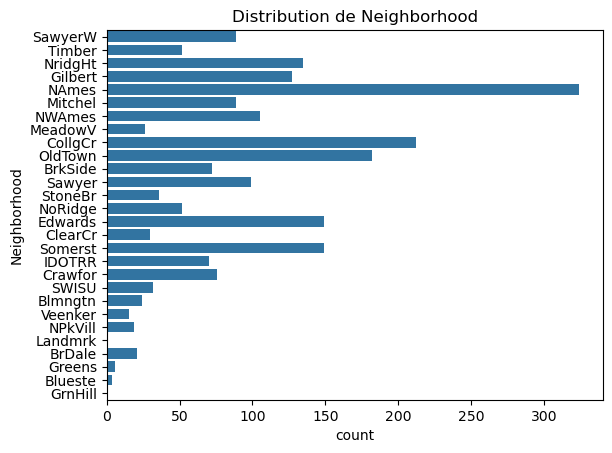

In [13]:
for col in ['MS Zoning', 'Street', 'Neighborhood']:
    sns.countplot(y=data_train[col])
    plt.title(f"Distribution de {col}")
    plt.show()


**Analyse bivariée**

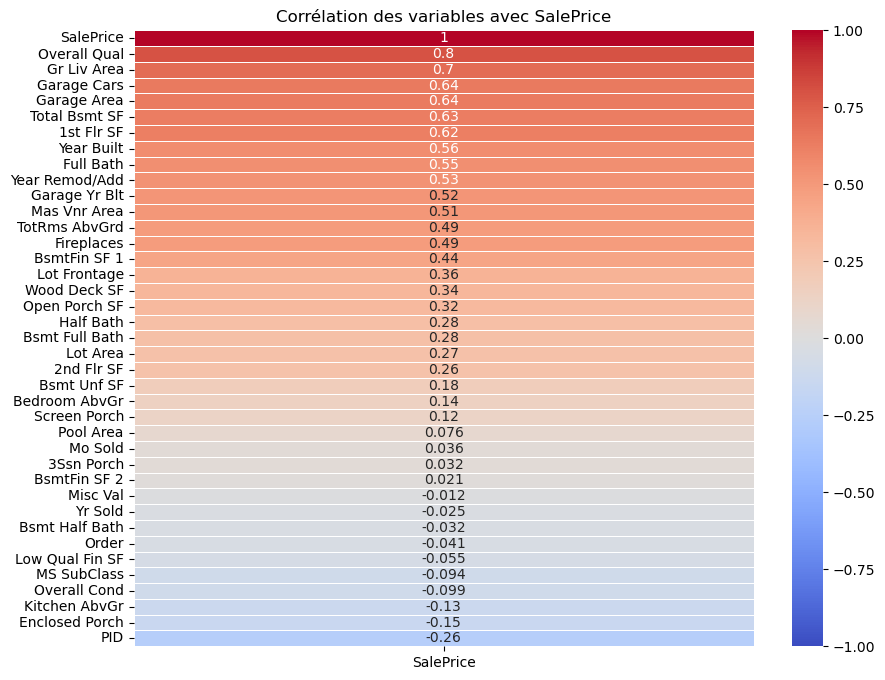

In [14]:


# Sélectionner uniquement les colonnes numériques
numeric_columns = data_train.select_dtypes(include=['number']).columns

# Calculer la corrélation uniquement pour les colonnes numériques
correlation = data_train[numeric_columns].corr()

# Extraire la corrélation de la colonne cible 'SalePrice'
corr_target = correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Créer une heatmap pour les corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_target, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Corrélation des variables avec SalePrice")
plt.show()



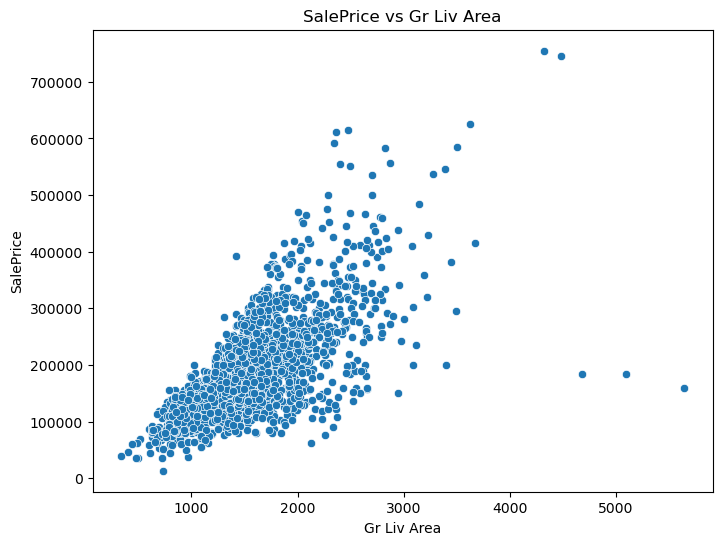

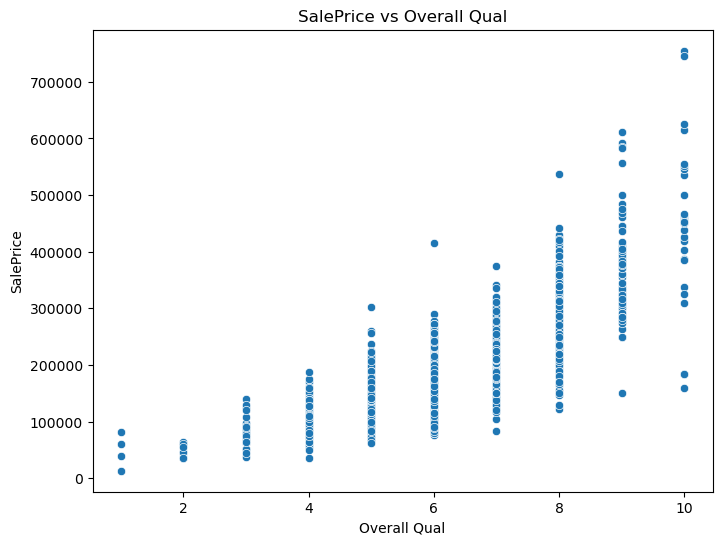

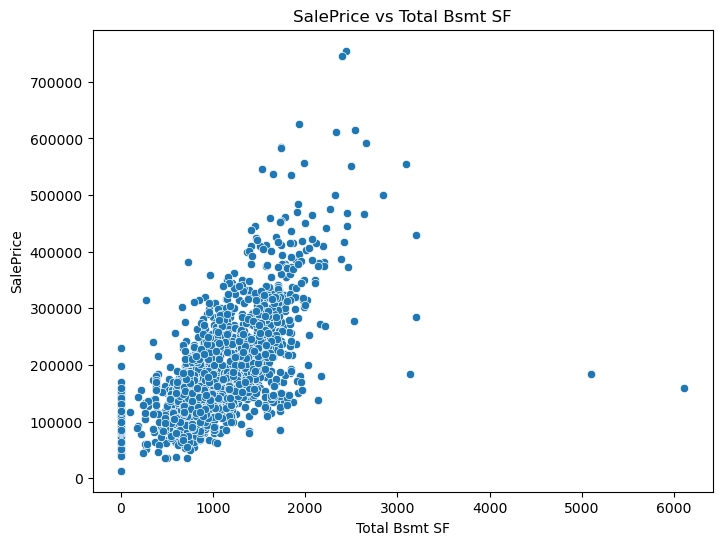

In [15]:
features = ['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_train[feature], y=data_train['SalePrice'])
    plt.title(f"SalePrice vs {feature}")
    plt.show()


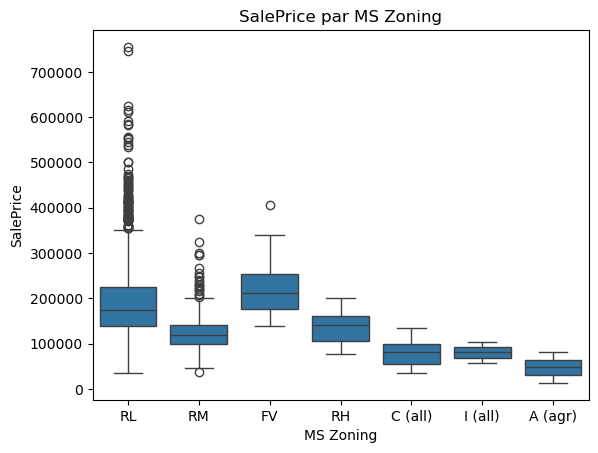

In [16]:
sns.boxplot(x='MS Zoning', y='SalePrice', data=data_train)
plt.title("SalePrice par MS Zoning")
plt.show()


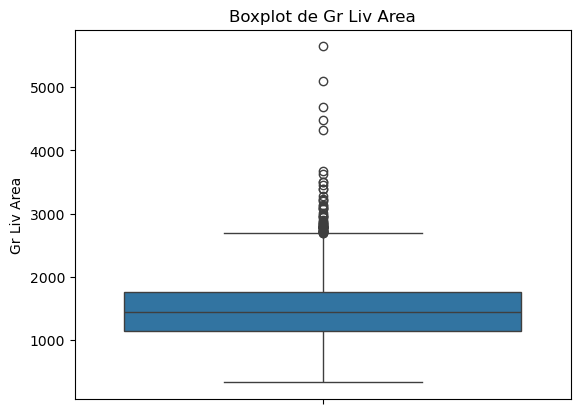

In [17]:
sns.boxplot(data_train['Gr Liv Area'])
plt.title("Boxplot de Gr Liv Area")
plt.show()


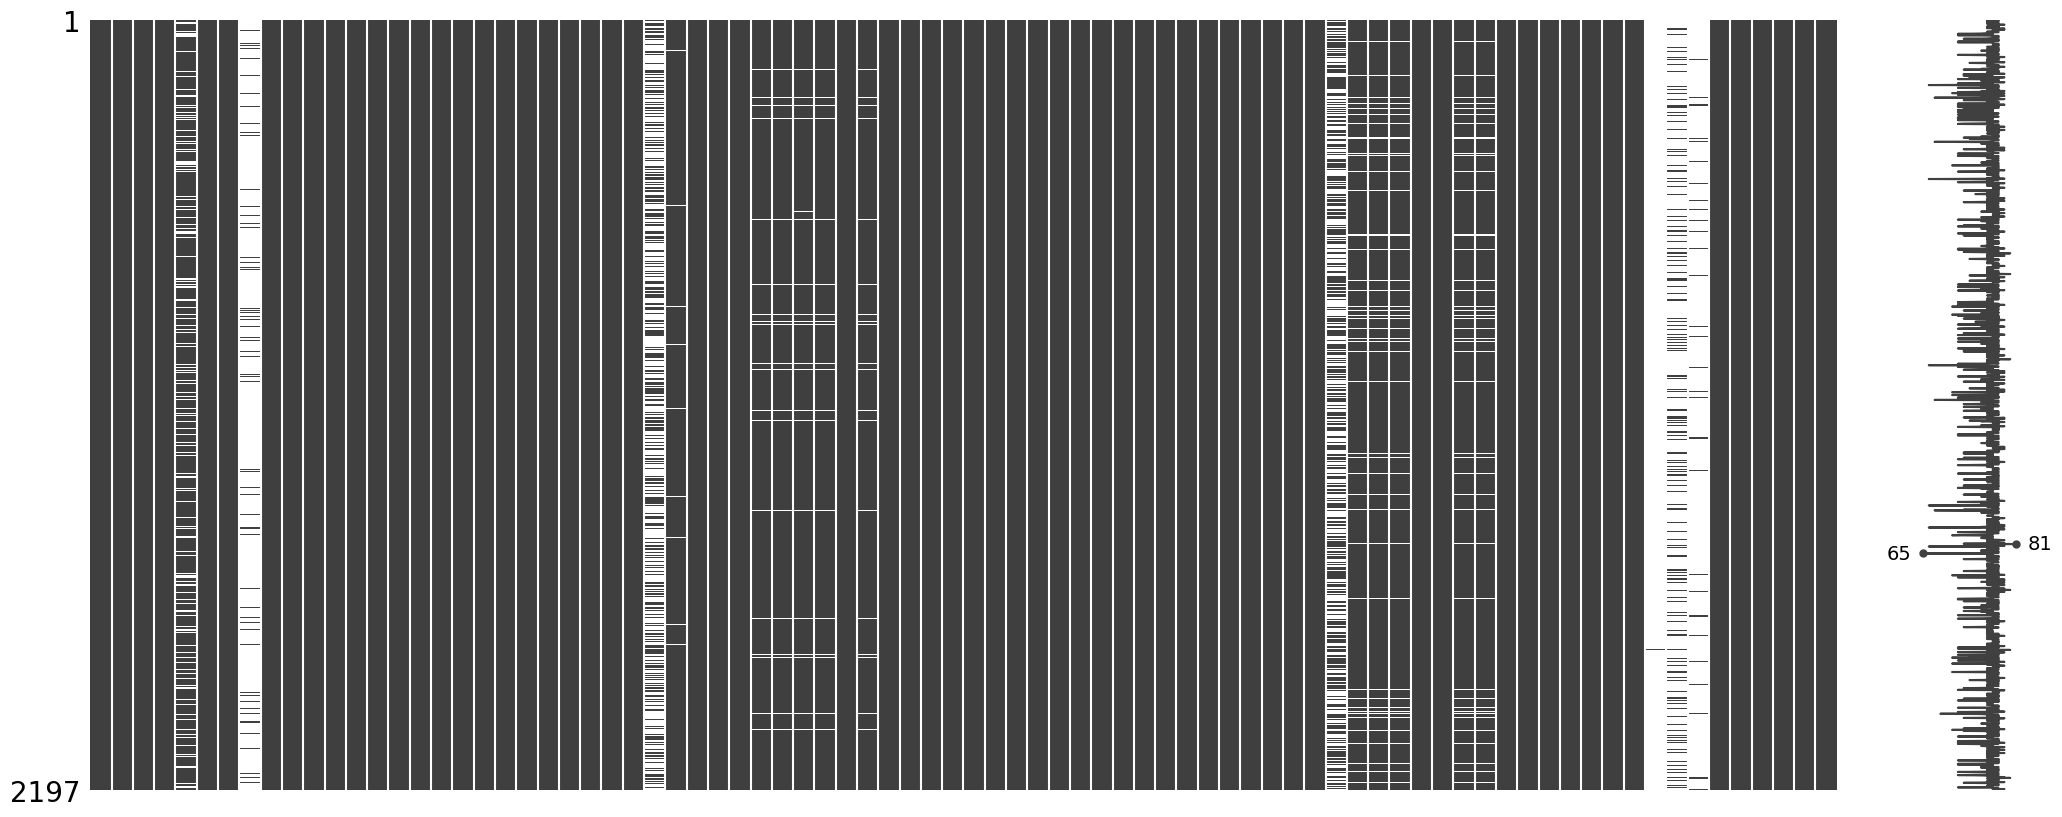

In [18]:
import missingno as msno
msno.matrix(data_train)
plt.show()


 visualiser les prix moyens par quartier

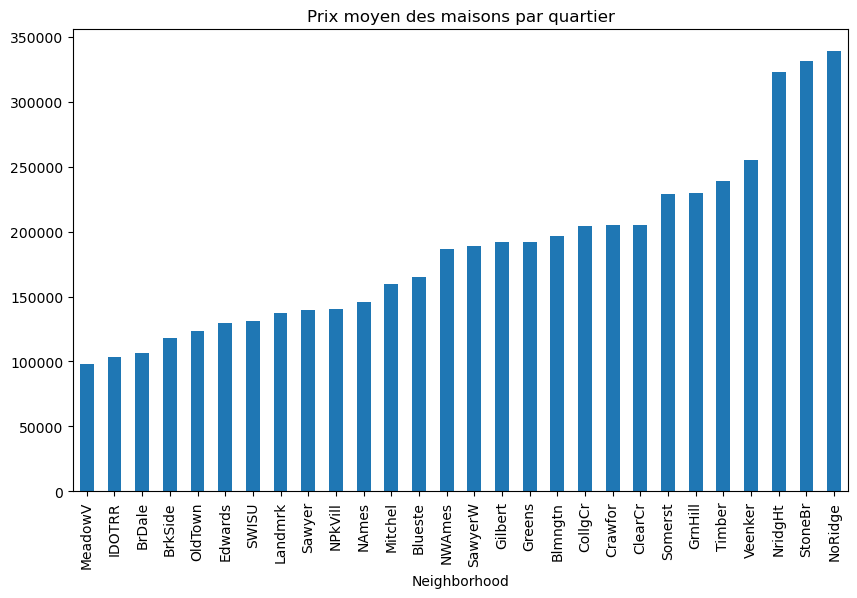

In [20]:
neighborhood_mean = data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values()
neighborhood_mean.plot(kind='bar', figsize=(10, 6))
plt.title("Prix moyen des maisons par quartier")
plt.show()


## **Traitement des valeurs manquantes**

In [21]:
# Supprimer les lignes où 'SalePrice' est manquante
data_train = data_train.dropna(subset=['SalePrice'])

# Calculer le pourcentage de valeurs manquantes par colonne
pourcentag_colonnes = data_train.isnull().mean() * 100

# Supprimer les colonnes avec plus de 70 % de valeurs manquantes
data_train = data_train.loc[:, pourcentag_colonnes < 70]

# Calculer le pourcentage de valeurs manquantes par ligne
pourcentag_lignes = data_train.isnull().mean(axis=1) * 100

# Supprimer les lignes avec plus de 50 % de valeurs manquantes
data_train = data_train.loc[pourcentag_lignes < 50]

# Remplir les valeurs manquantes numériques par la médiane de chaque colonne
data_train = data_train.fillna(data_train.select_dtypes(include=['number']).median())

# Remplir les valeurs manquantes catégorielles avec la valeur la plus fréquente (mode) s
for col in data_train.select_dtypes(include=['object']).columns:
    mode_value = data_train[col].mode()[0]
    data_train[col] = data_train[col].fillna(mode_value)



In [22]:
# Supprimer les colonnes avec plus de 70 % de valeurs manquantes
pourcentag_colonnes_test = data_test.isnull().mean() * 100
data_test = data_test.loc[:, pourcentag_colonnes_test < 70]

# Calculer le pourcentage de valeurs manquantes par ligne
pourcentag_lignes_test = data_test.isnull().mean(axis=1) * 100

# Supprimer les lignes avec plus de 50 % de valeurs manquantes
data_test = data_test.loc[pourcentag_lignes_test < 50]

# Remplir les valeurs manquantes numériques par la médiane de chaque colonne
data_test = data_test.fillna(data_test.select_dtypes(include=['number']).median())

# Remplir les valeurs manquantes catégorielles avec la valeur la plus fréquente (mode) 
for col in data_test.select_dtypes(include=['object']).columns:
    mode_value = data_test[col].mode()[0]
    data_test[col] = data_test[col].fillna(mode_value)


## **Preparation des données pour l'entrainement**

In [23]:
#Colonnes numériques et catégorielles
numeric = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
           'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
           '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
           'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
           'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
           'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
           'Yr Sold']

vari_categorielles = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
                      'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
                      'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                      'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
                      'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
                      'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
                      'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
                      'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type',
                      'Sale Condition']


In [24]:
# Combine les listes des colonnes quantitatives et qualitatives
quanti_quali = numeric + vari_categorielles

# Filtrer pour ne conserver que les colonnes pertinentes
data_quanti_quali = data_train[quanti_quali]



In [25]:
# Définir les variables indépendantes
x_vars = numeric + vari_categorielles

# Créer data_model avec les variables indépendantes et la colonne cible "SalePrice"
data_model = data_train[x_vars + ['SalePrice']]

# Renommer la colonne cible "SalePrice" en "target"
data_model = data_model.rename(columns={"SalePrice": "target"})
data_model.head()


,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,PID,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,target
0,80.0,9605,2007,2007,0.0,0.0,0.0,1218.0,1218.0,1218,0,0,1218,0.0,0.0,1,1,3,1,6,0,2.0,576.0,0,178,0,0,0,0,0,4,2009,531363010,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Detchd,2007.0,RFn,TA,TA,Y,WD,Normal,159000
1,90.0,14684,1990,1991,234.0,485.0,177.0,1496.0,2158.0,2196,0,0,2196,0.0,0.0,2,0,3,1,7,1,3.0,701.0,84,70,0,0,0,0,0,6,2009,906203120,20,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,1990.0,RFn,TA,TA,Y,WD,Normal,271900
2,69.0,14375,1958,1958,541.0,111.0,354.0,354.0,819.0,1344,0,0,1344,0.0,1.0,1,0,3,1,7,1,2.0,525.0,0,118,0,0,233,0,0,1,2009,916176030,20,RL,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Gd,Basment,1958.0,RFn,TA,TA,Y,COD,Abnorml,137500
3,48.0,6472,2008,2008,500.0,0.0,0.0,1451.0,1451.0,1456,0,0,1456,0.0,0.0,2,0,2,1,6,1,2.0,539.0,192,42,0,0,0,0,0,4,2009,528180130,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,2008.0,RFn,TA,TA,Y,WD,Normal,248500
4,61.0,9734,2004,2004,0.0,241.0,113.0,30.0,384.0,744,630,0,1374,0.0,0.0,2,1,3,1,7,0,2.0,400.0,0,0,0,0,0,0,0,5,2009,528290030,80,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,2004.0,Fin,TA,TA,Y,WD,Normal,167000


## **Regression lineair elastic net**

In [27]:
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

# Diviser les données en ensembles d'entraînement et de test
x = data_model.drop(columns=['target'])
y = data_model['target']

# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Créer les préprocesseurs pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

# Créer le pipeline avec le préprocesseur
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])
parameters = {
    'regressor__alpha': [1e-3, 1e-2, 1e-1, 1, 10],
    'regressor__l1_ratio': [0.7, 0.8, 0.9, 1]
}

In [28]:
# Effectuer la recherche sur grille avec validation croisée
grid = GridSearchCV(pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)

In [29]:
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Lot '
                                                                          'Frontage',
                                                                          'Lot '
                                                                          'Area',
                                                                          'Year '
                                                                          'Built',
                                                                          'Year '
                                                                          'Remod/Add',
                                                                          'Mas '
                                                                          'Vnr '
                                                                          'Area',
                                                                          'BsmtFin '
                                                                          'SF '
                                                                          '1',
                                                                          'BsmtFin '
                                                                          'SF '
                                                                          '2',
                                                                          'Bsmt '
                                                                          'Unf '
                                                                          'SF',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          '2nd '
                                                                          'Flr '
                                                                          'SF',
                                                                          'Low '
                                                                          'Qual '
                                                                          'Fin '
                                                                          'SF',
                                                                          'Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Bsmt '
                                                                          'Full '
                                                                          'Bath',
                                                                          'B...
                                                                          'Exterior '
                                                                          '2nd',
                                                                          'Mas '
                                                                          'Vnr '
                                                                          'Type',
                                                                          'Exter '

In [30]:
# maintenant afficher les resultats

resultat_elastic = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_elastic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
19,4.316895,1.778401,0.073943,0.019495,10.000,1.0,"{'regressor__alpha': 10, 'regressor__l1_ratio'...",0.802843,0.906341,0.835084,0.848089,0.043242,1,0.989566,0.988599,0.989896,0.989354,5.503337e-04
15,8.342249,0.586469,0.058352,0.008387,1.000,1.0,"{'regressor__alpha': 1, 'regressor__l1_ratio': 1}",0.804435,0.900987,0.834102,0.846508,0.040382,2,0.999840,0.999827,0.999844,0.999837,7.260618e-06
10,4.728803,0.664167,0.091787,0.032018,0.100,0.9,"{'regressor__alpha': 0.1, 'regressor__l1_ratio...",0.800346,0.869650,0.847009,0.839002,0.028854,3,0.935304,0.921159,0.921979,0.926147,6.483541e-03
4,10.490915,0.644298,0.072590,0.002915,0.010,0.7,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.802419,0.867165,0.846271,0.838618,0.026981,4,0.957602,0.950465,0.951081,0.953049,3.228743e-03
5,10.495278,0.659155,0.080243,0.012572,0.010,0.8,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.802015,0.866032,0.844828,0.837625,0.026627,5,0.966266,0.961245,0.961859,0.963123,2.236530e-03
9,2.629161,0.346571,0.068847,0.009400,0.100,0.8,"{'regressor__alpha': 0.1, 'regressor__l1_ratio...",0.795960,0.869382,0.843508,0.836283,0.030406,6,0.924632,0.906338,0.907784,0.912918,8.304410e-03
6,10.405320,0.634163,0.080497,0.007419,0.010,0.9,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.800815,0.864167,0.841856,0.835613,0.026237,7,0.980459,0.978169,0.978701,0.979110,9.785540e-04
8,2.115459,0.082165,0.064685,0.005921,0.100,0.7,"{'regressor__alpha': 0.1, 'regressor__l1_ratio...",0.792390,0.868231,0.839861,0.833494,0.031287,8,0.918504,0.897548,0.899734,0.905262,9.405783e-03
0,9.709527,0.447079,0.071003,0.006000,0.001,0.7,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.798786,0.861799,0.837219,0.832601,0.025931,9,0.995554,0.995202,0.995395,0.995384,1.438032e-04
1,10.122285,0.240313,0.066670,0.002854,0.001,0.8,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.798333,0.861330,0.836153,0.831939,0.025891,10,0.997639,0.997470,0.997581,0.997563,7.024339e-05


In [31]:
# Afficher les résultats avec les meilleurs paramètres
print("Meilleur score (test) :", grid.best_score_)
print("Meilleurs paramètres :", grid.best_params_)

Meilleur score (test) : 0.8480889955650133
Meilleurs paramètres : {'regressor__alpha': 10, 'regressor__l1_ratio': 1}


## **RandomForestRegressor**

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

In [34]:
# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]
)

In [40]:
parameters = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 20],
    'regressor__min_samples_split': [2, 3],
    'regressor__min_samples_leaf': [1, 2]
}

In [41]:
#Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)

c:\Users\Utilisateur\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         PowerTransformer(),
                                                                         ['Lot '
                                                                          'Frontage',
                                                                          'Lot '
                                                                          'Area',
                                                                          'Year '
                                                                          'Built',
                                                                          'Year '
                                                                          'Remod/Add',
                                                                          'Mas '
                                                                          'Vnr '
                                                                          'Area',
                                                                          'BsmtFin '
                                                                          'SF '
                                                                          '1',
                                                                          'BsmtFin '
                                                                          'SF '
                                                                          '2',
                                                                          'Bsmt '
                                                                          'Unf '
                                                                          'SF',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          '2nd '
                                                                          'Flr '
                                                                          'SF',
                                                                          'Low '
                                                                          'Qual '
                                                                          'Fin '
                                                                          'SF',
                                                                          'Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Bsmt '
                                                                          'Full '
                                                                          'Bath',...
                                                                          'Qual',
                                                                          'Bsmt '
                                                                          'Cond',
                                                                          'Bsmt '
                                                                          'Exposure',
                                                                          'BsmtFin '
                                                                     

In [42]:
# Afficher les résultats
resultat_forest = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_forest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
9,138.762836,1.412845,0.247693,0.011067,20,1,2,400,"{'regressor__max_depth': 20, 'regressor__min_s...",0.876046,0.871098,0.863050,0.870065,0.005356,1,0.982730,0.981318,0.982719,0.982255,0.000663
2,95.324369,8.764063,0.191261,0.016865,None,1,3,300,"{'regressor__max_depth': None, 'regressor__min...",0.871795,0.867142,0.865410,0.868116,0.002696,2,0.982189,0.982363,0.980675,0.981743,0.000758
1,151.733134,1.185910,0.281952,0.024092,None,1,2,400,"{'regressor__max_depth': None, 'regressor__min...",0.873029,0.870152,0.860919,0.868033,0.005166,3,0.983091,0.982388,0.982909,0.982796,0.000298
0,106.752805,1.099145,0.237369,0.031765,None,1,2,300,"{'regressor__max_depth': None, 'regressor__min...",0.873203,0.869435,0.861053,0.867897,0.005078,4,0.983218,0.981906,0.981853,0.982326,0.000631
8,101.115669,2.067274,0.175533,0.002024,20,1,2,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.870930,0.868040,0.863211,0.867393,0.003184,5,0.983027,0.982206,0.982320,0.982517,0.000363
11,115.466376,0.469323,0.228776,0.019239,20,1,3,400,"{'regressor__max_depth': 20, 'regressor__min_s...",0.870720,0.870219,0.860438,0.867125,0.004733,6,0.982826,0.980226,0.981106,0.981386,0.001080
3,135.259871,3.113546,0.330853,0.092730,None,1,3,400,"{'regressor__max_depth': None, 'regressor__min...",0.871311,0.868767,0.859525,0.866534,0.005064,7,0.982173,0.980707,0.981176,0.981352,0.000611
12,72.113051,0.493231,0.178933,0.009510,20,2,2,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.869542,0.864753,0.861269,0.865188,0.003391,8,0.974498,0.974907,0.974852,0.974752,0.000181
10,86.710149,1.633888,0.182921,0.010459,20,1,3,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.868871,0.868648,0.857784,0.865101,0.005175,9,0.982603,0.981482,0.980692,0.981592,0.000784
13,94.060126,2.331562,0.188807,0.036030,20,2,2,400,"{'regressor__max_depth': 20, 'regressor__min_s...",0.871406,0.863023,0.860420,0.864950,0.004687,10,0.974796,0.973928,0.974395,0.974373,0.000355


**enregistrer le model avec le bon format**

In [68]:
import joblib

# Sauvegarder le pipeline complet avec jobli
joblib.dump(grid.best_estimator_, 'Model_final.pkl')

['Model_final.pkl']

**Comparaison des modèles en fonction R² Score, MAE et MSE**

In [71]:
# Configurer le suivi MLflow
tracking_dir = r"C:\Users\Utilisateur\Desktop\Prédiction_du_prix_des_maisons_à_Ames,_Iowa\mlruns"
os.makedirs(tracking_dir, exist_ok=True)
mlflow.set_tracking_uri(f"file:///{tracking_dir}")
# Définir une expérience MLflow
experiment_name = "Final_Experiments"
mlflow.set_experiment(experiment_name)

2024/12/29 15:29:44 INFO mlflow.tracking.fluent: Experiment with name 'Final_Experiments' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:\\Users\\Utilisateur\\Desktop\\Prédiction_du_prix_des_maisons_à_Ames,_Iowa\\mlruns/778394828780845656', creation_time=1735482584614, experiment_id='778394828780845656', last_update_time=1735482584614, lifecycle_stage='active', name='Final_Experiments', tags={}>

c:\Users\Utilisateur\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Utilisateur\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


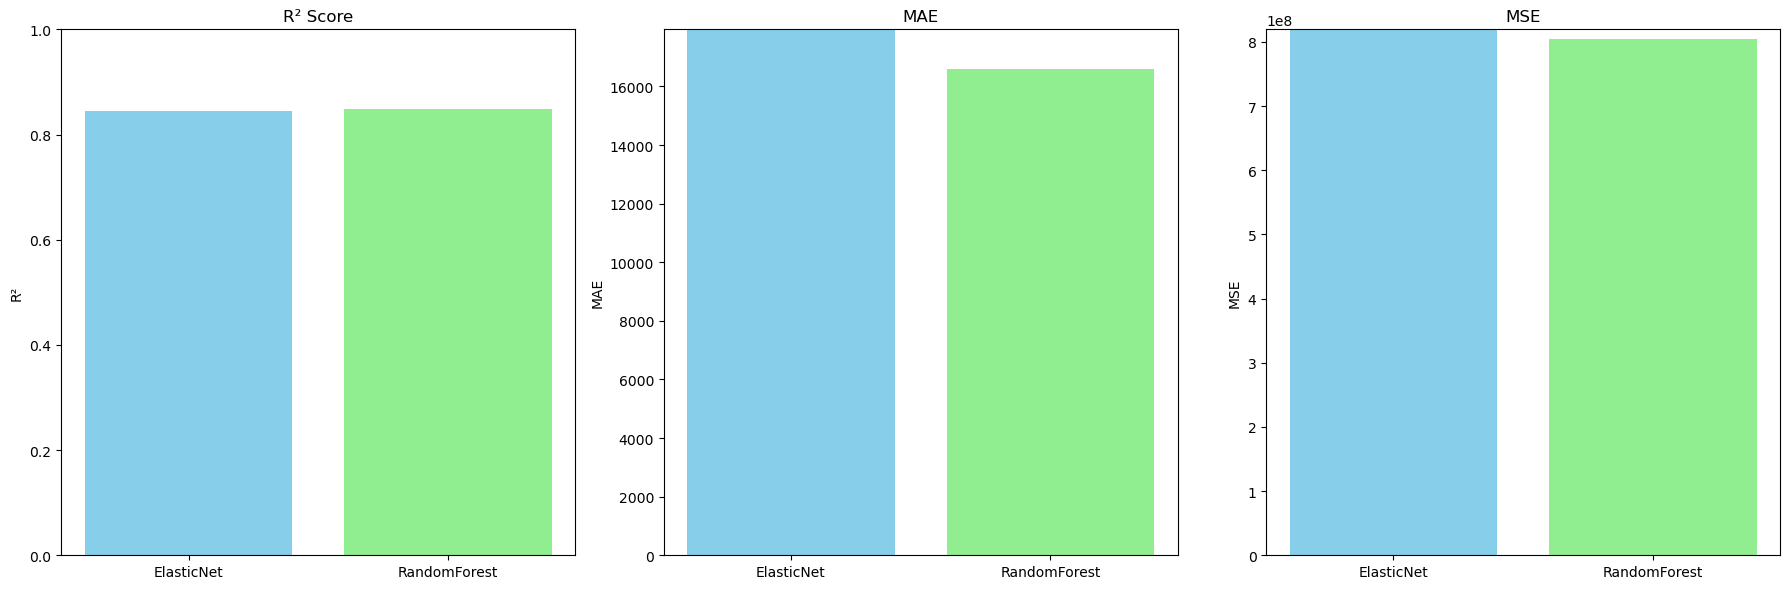


Comparaison des modèles :
ElasticNet R²: 0.8452314337244438
RandomForest R²: 0.8482110577018123
ElasticNet MAE: 17948.897202683685
RandomForest MAE: 16585.80459555159
ElasticNet MSE: 819569272.1233625
RandomForest MSE: 803790821.0263523


In [67]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Création du pipeline pour ElasticNet
pipeline_elastic = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

# Hyperparamètres pour ElasticNet
parameters_elastic = {
    'regressor__alpha': [1e-3, 1e-2, 1e-1, 1, 10],
    'regressor__l1_ratio': [0.7, 0.8, 0.9, 1]
}

# Recherche sur grille pour ElasticNet
grid_elastic = GridSearchCV(pipeline_elastic, parameters_elastic, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)
grid_elastic.fit(x_train, y_train)

# Créer le pipeline pour RandomForestRegressor
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Hyperparamètres pour RandomForestRegressor
parameters_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Recherche sur grille pour RandomForestRegressor
grid_rf = GridSearchCV(pipeline_rf, parameters_rf, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)
grid_rf.fit(x_train, y_train)


# Prédictions sur le jeu de test
y_pred_elastic = grid_elastic.predict(x_test)
y_pred_rf = grid_rf.predict(x_test)

# Calcul des métriques
metrics = {}

# R² Score
metrics['ElasticNet R²'] = r2_score(y_test, y_pred_elastic)
metrics['RandomForest R²'] = r2_score(y_test, y_pred_rf)

# MAE (Mean Absolute Error)
metrics['ElasticNet MAE'] = mean_absolute_error(y_test, y_pred_elastic)
metrics['RandomForest MAE'] = mean_absolute_error(y_test, y_pred_rf)

# MSE (Mean Squared Error)
metrics['ElasticNet MSE'] = mean_squared_error(y_test, y_pred_elastic)
metrics['RandomForest MSE'] = mean_squared_error(y_test, y_pred_rf)

# Visualisation des résultats
labels = ['ElasticNet', 'RandomForest']
r2_scores = [metrics['ElasticNet R²'], metrics['RandomForest R²']]
mae_scores = [metrics['ElasticNet MAE'], metrics['RandomForest MAE']]
mse_scores = [metrics['ElasticNet MSE'], metrics['RandomForest MSE']]

# Configuration de la figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# R² Score
axes[0].bar(labels, r2_scores, color=['skyblue', 'lightgreen'])
axes[0].set_title('R² Score')
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('R²')

# MAE
axes[1].bar(labels, mae_scores, color=['skyblue', 'lightgreen'])
axes[1].set_title('MAE')
axes[1].set_ylim(0, max(mae_scores) + 1)
axes[1].set_ylabel('MAE')

# MSE
axes[2].bar(labels, mse_scores, color=['skyblue', 'lightgreen'])
axes[2].set_title('MSE')
axes[2].set_ylim(0, max(mse_scores) + 1)
axes[2].set_ylabel('MSE')

# Afficher le graphique
plt.tight_layout()
plt.show()

# Afficher les résultats des métriques
print("\nComparaison des modèles :")
for metric, value in metrics.items():
    print(f"{metric}: {value}")



In [72]:
# Enregistrement des résultats avec MLflow
with mlflow.start_run(run_name="Final_Experiments"):
    # Logging ElasticNet
    mlflow.log_metric("ElasticNet_Best_Score", grid_elastic.best_score_)
    mlflow.log_params(grid_elastic.best_params_)
    mlflow.sklearn.log_model(grid_elastic.best_estimator_, "ElasticNet_Model")

    # Logging RandomForest
    mlflow.log_metric("RandomForest_Best_Score", grid_rf.best_score_)
    mlflow.log_params(grid_rf.best_params_)
    mlflow.sklearn.log_model(grid_rf.best_estimator_, "RandomForest_Model")

    print("Résultats enregistrés dans MLflow avec succès !")

2024/12/29 15:31:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/29 15:31:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Résultats enregistrés dans MLflow avec succès !


*Comparaison du Score R² entre les Ensembles d'Entraînement et de Test*

In [44]:
# Récupérer les prédictions pour l'ensemble d'entraînement
y_train_pred = grid.predict(x_train)

# Récupérer les prédictions pour l'ensemble de test
y_test_pred = grid.predict(x_test)

# Calculer les métriques pour l'ensemble d'entraînement
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculer les métriques pour l'ensemble de test
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Afficher les résultats
print(f"Performance sur l'ensemble d'entraînement:")
print(f"R2 : {train_r2}")
print(f"MSE : {train_mse}")
print(f"MAE : {train_mae}\n")

print(f"Performance sur l'ensemble de test:")
print(f"R2 : {test_r2}")
print(f"MSE : {test_mse}")
print(f"MAE : {test_mae}")

Performance sur l'ensemble d'entraînement:
R2 : 0.9835016971800115
MSE : 113969995.46015435
MAE : 6380.3054799415395

Performance sur l'ensemble de test:
R2 : 0.8486930256676845
MSE : 801238583.5502144
MAE : 16276.812375295221


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8372\33711856.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ensemble', y='R²', data=r2_df, palette='viridis')


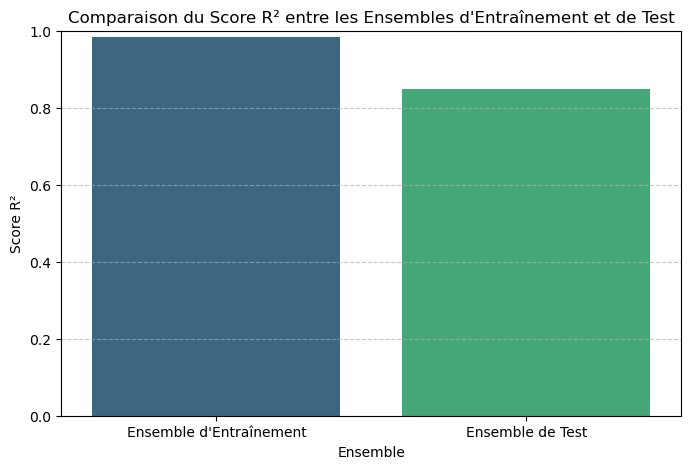

In [45]:
# Création d'un DataFrame pour le score R²
r2_data = {
    'Ensemble': ['Ensemble d\'Entraînement', 'Ensemble de Test'],
    'R²': [train_r2, test_r2]
}

r2_df = pd.DataFrame(r2_data)

# Création du graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(x='Ensemble', y='R²', data=r2_df, palette='viridis')

# Personnalisation du graphique
plt.title('Comparaison du Score R² entre les Ensembles d\'Entraînement et de Test')
plt.xlabel('Ensemble')
plt.ylabel('Score R²')
plt.ylim(0, 1)  # R² est généralement entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Affiché les valeurs predictes

In [65]:
# Obtenir les prédictions pour l'ensemble de test
y_pred = grid.predict(x_test)
y_pred

array([227978.57      , 143044.2088519 , 254323.775     , 335652.455     ,
       216392.76414167, 246048.50607143, 225586.3875    , 150336.455     ,
       299930.005     , 147785.37871124, 140658.85408521, 147749.35342666,
       203622.72213203, 131757.14733085, 182427.66160256, 155550.72791667,
       204101.33021132, 298845.5075    , 141775.68459416, 240850.78208333,
       236849.69666667, 177035.08050299, 262751.77      , 286194.77166667,
        93961.29422078, 170820.17375428, 156431.69949715, 146785.29992131,
       213339.03      , 153709.38159361, 243933.79824713, 127518.48844517,
       180808.97849261, 318131.6075    , 210705.245     , 143949.21698413,
       243283.10053571, 161608.84098919, 205177.33791667, 130275.97699877,
       170560.72118867, 158960.12878809, 298988.215     ,  67442.5925    ,
       138443.84440414, 253795.44071429,  92826.06219697, 317264.5975    ,
       170801.48380252, 128560.01617669, 145511.14755952, 185311.91405337,
       135419.50990779, 1

In [63]:
#Calcul de l'erreur sur l'ensemble de test
grid.best_estimator_.score(x_test, y_test)

0.8486930256676845

**Feature importance**

**Creation d'un fichier contenant les caracteristique des batitiment pour la prediction**

In [79]:
x_train.shape


(1757, 74)

In [75]:
# Enregistrer les 50 premières lignes de x_train dans un fichier CSV
x_train.head(50).to_csv('batiment_a_predire.csv', index=False)